# Jamboree Education - Linear Regression

# Context

Jamboree is a renowned educational institution that has successfully assisted numerous students in gaining admission to top colleges abroad. With their proven problem-solving methods, they have helped students achieve exceptional scores on exams like GMAT, GRE, and SAT with minimal effort.

To further support students, Jamboree has recently introduced a new feature on their website. This feature enables students to assess their probability of admission to Ivy League colleges, considering the unique perspective of Indian applicants.

The goal is to create a prediction model that will calculate the likelihood that Indian students would be accepted into graduate programs at IVY league universities. We seek to determine the critical elements that have a major impact on admission probability by examining past data on graduate admissions and other factors that affect admission choices.


# Import Libraries

In [134]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Exploratory Data Analysis

In [135]:
df=pd.read_csv('/content/Jamboree_Admission.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [137]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [138]:
df.nunique(axis=0)

,0
Serial No.,500
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance of Admit,61


## Observation :

There are nine columns and five hundred rows.

Since the maximum value in each column is found to be insufficient, we can decrease the data type's size, which will help our data use less memory.

Every column has a data type of either float or int.

Certain columns have unique values that are less than 10, which can be changed to categorical columns.



In [139]:
df1=df.copy()

In [140]:
# Since we don't want our model to develop any understanding based on row numbers, we are eliminating unique row identifiers.

df1.drop(columns=['Serial No.'], inplace=True)

In [141]:
df1.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)


In [142]:
df1[['University Rating', 'SOP', 'LOR','Research']] = df1[['University Rating', 'SOP', 'LOR','Research']].astype('category')


In [143]:
int_columns=['GRE Score','TOEFL Score']
for i in int_columns:
  df1[i]=df1[i].astype('int16')

In [144]:
float_columns=['CGPA','Chance of Admit']
for i in float_columns:
  df1[i]=df1[i].astype('float16')

In [145]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int16   
 1   TOEFL Score        500 non-null    int16   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float16 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float16 
dtypes: category(4), float16(2), int16(2)
memory usage: 7.0 KB


In [146]:
df1.describe(include='all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.0,500.0,500.0,500.000000,500.0,500.000000
unique,NaN,NaN,5.0,9.0,9.0,NaN,2.0,NaN
top,NaN,NaN,3.0,4.0,3.0,NaN,1.0,NaN
freq,NaN,NaN,162.0,89.0,99.0,NaN,280.0,NaN
mean,316.472000,107.192000,NaN,NaN,NaN,8.578125,NaN,0.721680
std,11.295148,6.081868,NaN,NaN,NaN,0.604492,NaN,0.141113
min,290.000000,92.000000,NaN,NaN,NaN,6.800781,NaN,0.340088
25%,308.000000,103.000000,NaN,NaN,NaN,8.128906,NaN,0.629883
50%,317.000000,107.000000,NaN,NaN,NaN,8.562500,NaN,0.720215
75%,325.000000,112.000000,NaN,NaN,NaN,9.039062,NaN,0.819824


# Check for duplicate

In [147]:
df1.duplicated().sum()


0

# Check for outliers

In [148]:
numeric_cols = ['GRE Score','TOEFL Score', 'CGPA', 'Chance of Admit']

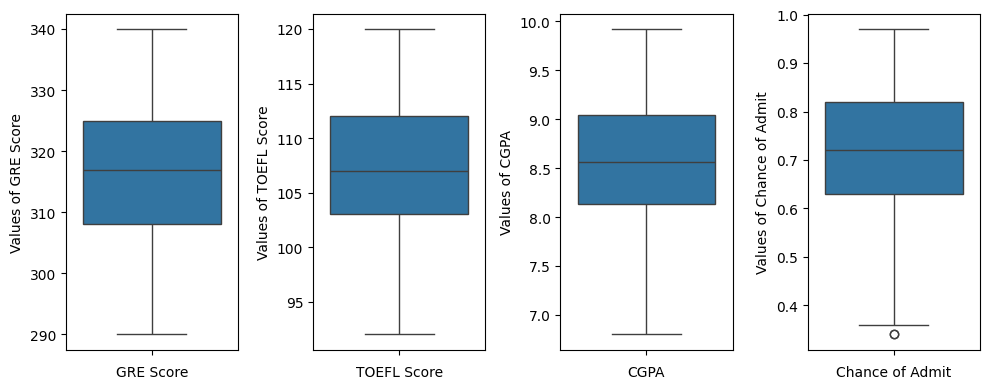

In [149]:
plt.figure(figsize=(10,4))
i=1
for col in numeric_cols:
  ax = plt.subplot(1,4,i)
  sns.boxplot(df1[col])
  #plt.title(col)
  plt.xlabel(col)
  plt.ylabel(f'Values of {col}')
  i+=1
plt.tight_layout()
plt.show()

# Independent Variables Correlation


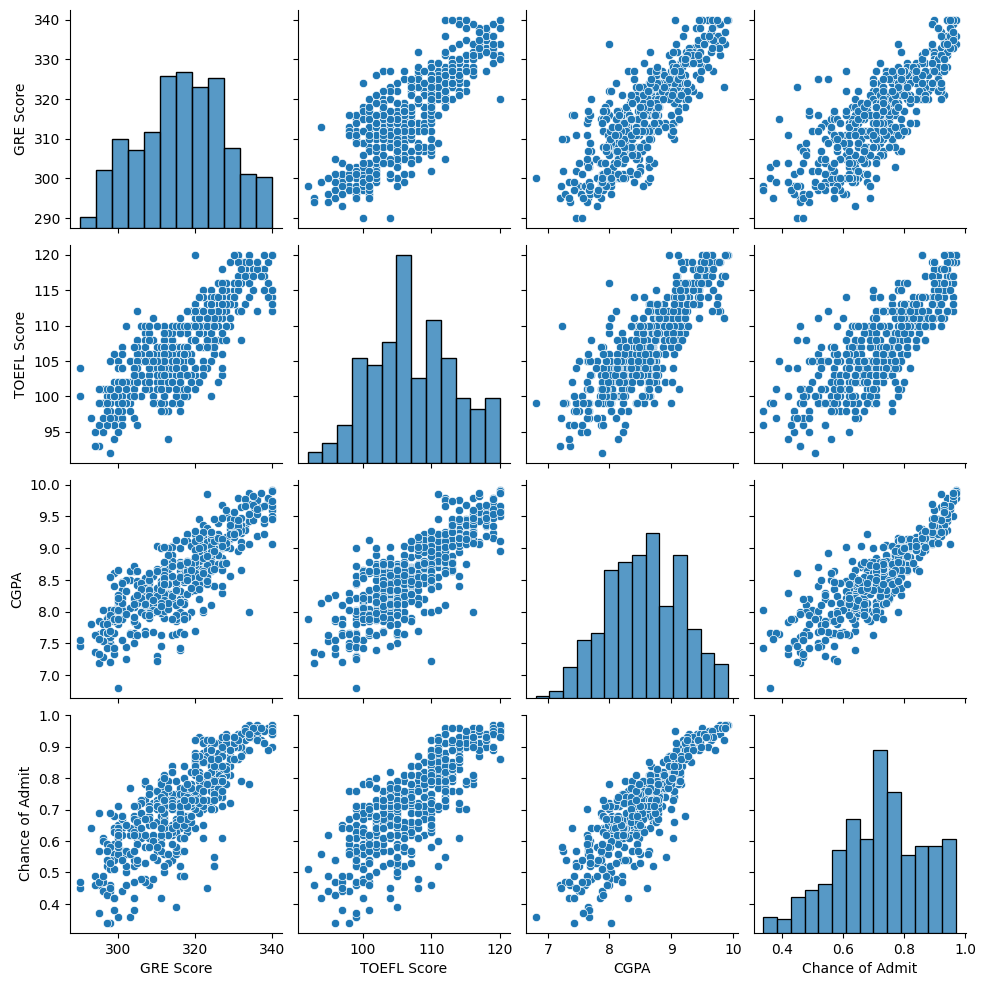

In [150]:
sns.pairplot(df1)
plt.show()

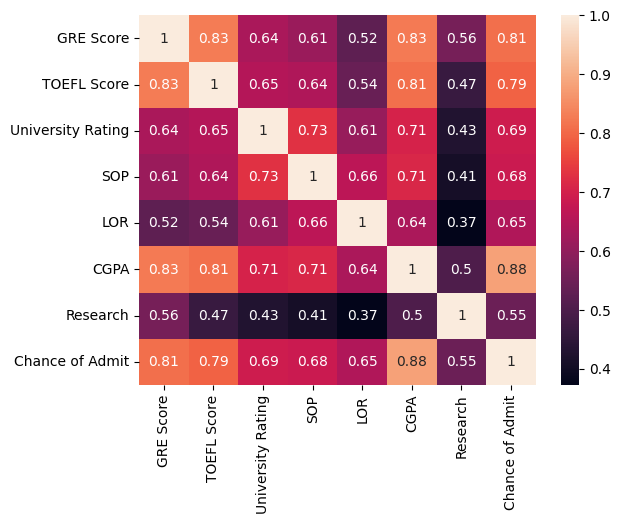

In [151]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

## Observation :

CGPA, TOEFL Score and GRE Score show strong positive correlation to Chance of Admit

University Rating show positive correlation to Chance of Admit, CGPA and all other factors except Research

Chance of Admit show strong positive correlation to CGPA, GRE Score, TOEFL Score

Research shows weak positive correlation to all other factors



# Distribution of Continuous Variables

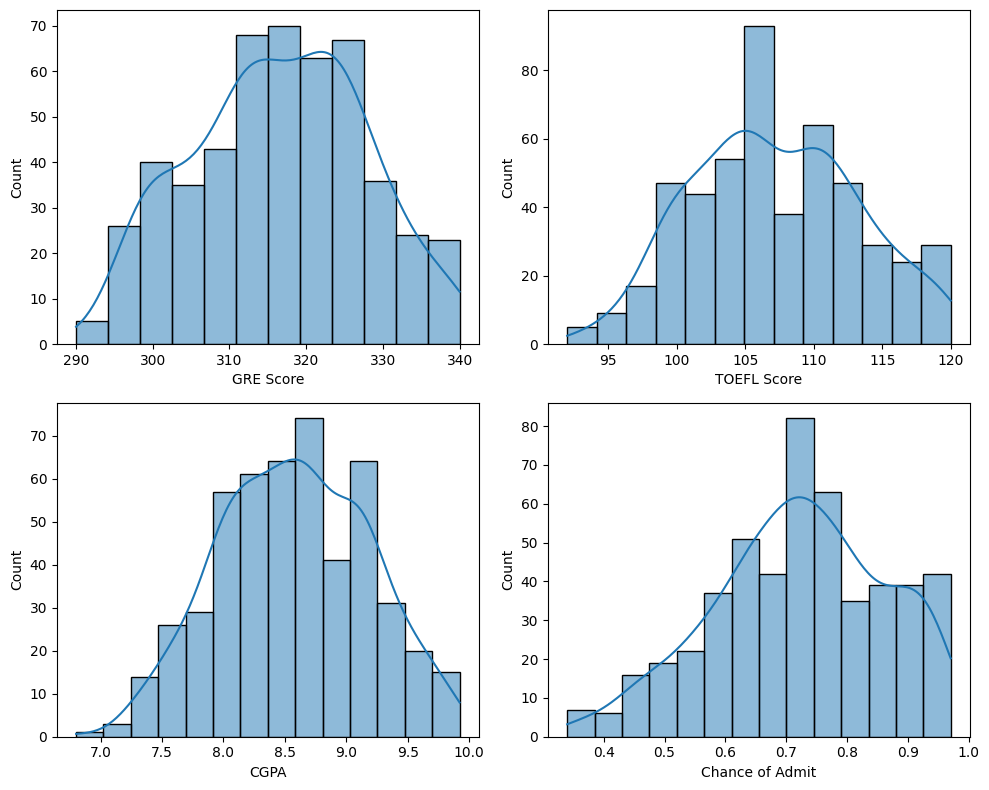

In [152]:
plt.figure(figsize=(10,8))
i=1
for col in numeric_cols:
  ax=plt.subplot(2,2,i)
  sns.histplot(data=df1[col], kde=True)
  #plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  i += 1

plt.tight_layout()
plt.show()

## Observation :   

The majority of students receive scores between 310 and 320 on the GRE, which ranges from 290 to 340.

Maximum pupils score between 105 and 110 on the TOEFL, with scores ranging from 90 to 120.

The CGPA ranges from 7 to 10, with a maximum of 8.5 to 9.

The maximum chance of admission is between 70% and 75%.



# Distribution of Categorical Variables

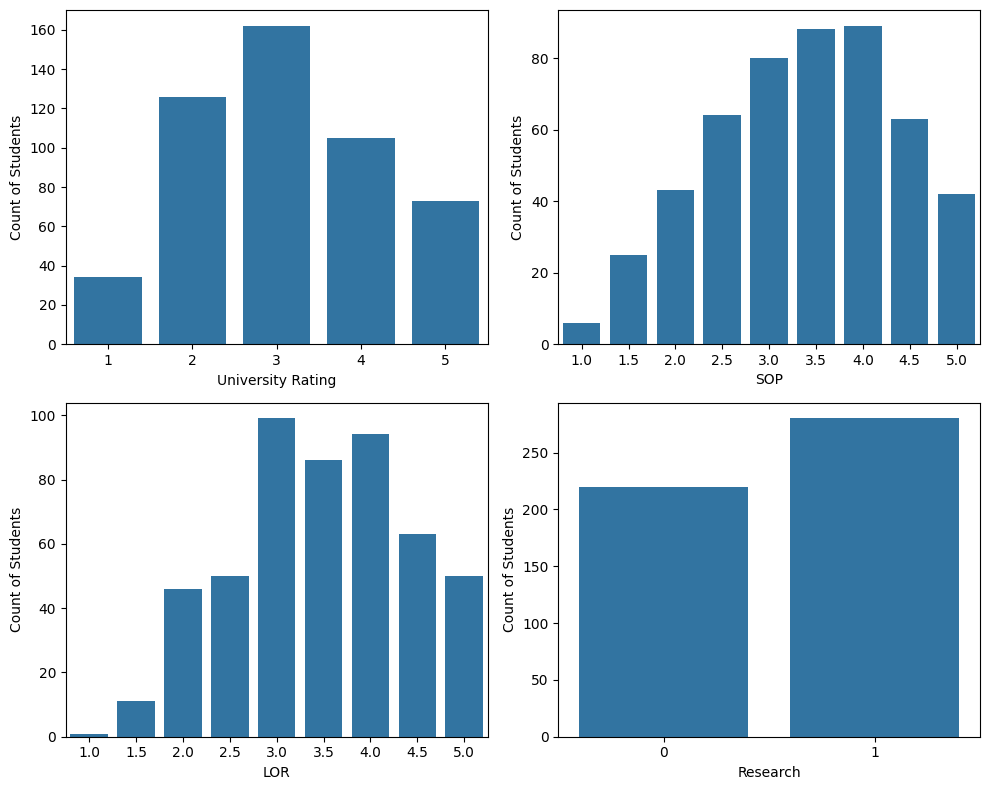

In [153]:
cat_cols=['University Rating', 'SOP', 'LOR','Research']
plt.figure(figsize=(10,8))
i=1

for col in cat_cols:
  ax = plt.subplot(2,2,i)
  sns.countplot(x=df1[col])
  #plt.title(f'Distribution of {col}', fontsize=10)
  plt.xlabel(col)
  plt.ylabel('Count of Students')
  i+=1

plt.tight_layout()
plt.show()

## Observation :    

The majority of students are from universities with ratings of 3, 2, and 4.

Strength 4 is the highest number of students who received a Statement of Purpose, followed by 3.5 and 3.

The maximum number of pupils was reached by the letter of recommendation with strength 3.

The majority of students have completed their research.



# Bivarient Analysis

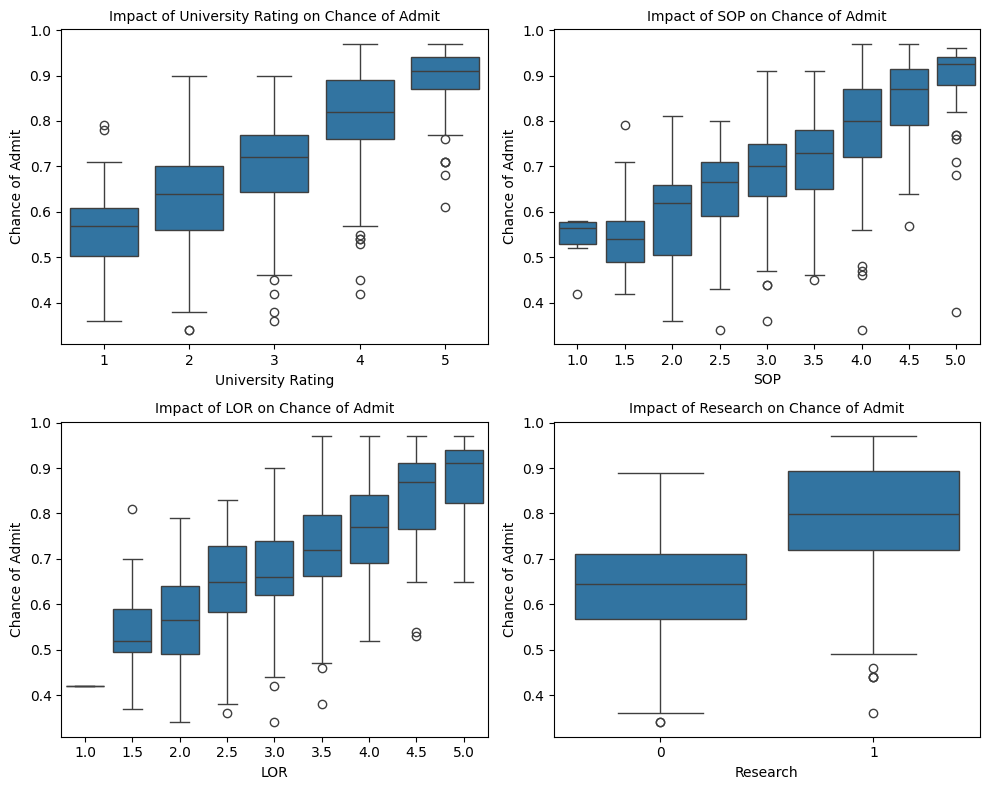

In [154]:
plt.figure(figsize=(10,8))
i=1
for col in cat_cols:
  ax = plt.subplot(2,2,i)
  sns.boxplot(data = df1, x=col, y='Chance of Admit')
  plt.title(f"Impact of {col} on Chance of Admit", fontsize=10)
  plt.xlabel(col)
  plt.ylabel('Chance of Admit')
  i+=1

plt.tight_layout()
plt.show()

## Observation :    

With a grade of 5, the university has the highest chance of being admitted, followed by 4, 3, 2, 1.

COA reaches its maximum at SOP strength of 5 and then starts to decline till it reaches 1.

Strength 5 LOR has the highest likelihood of being admitted.

Students who have conducted research are more likely to be admitted.



# Model Preparation

Train-Test Split

In [155]:
df2=df.copy()

In [156]:
df2.drop(columns=['Serial No.'], inplace=True)

In [157]:
df2.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [158]:
x = df2.drop(columns=['Chance of Admit'])
y = df2[['Chance of Admit']]

In [159]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [160]:
y.head()


,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [161]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                     random_state=42)

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (400, 7)
Shape of x_test: (100, 7)
Shape of y_train: (400, 1)
Shape of y_test: (100, 1)


In [162]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


## Standard Scaling

In [163]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [164]:
x_train_scaled

array([[ 0.38998634,  0.6024183 , -0.09829757, ...,  0.56498381,
         0.4150183 ,  0.89543386],
       [-0.06640493,  0.6024183 ,  0.7754586 , ...,  1.65149114,
        -0.06785154, -1.11677706],
       [-1.25302222, -0.87691722, -0.09829757, ..., -0.52152352,
        -0.13445427, -1.11677706],
       ...,
       [-1.34430047, -1.37002906, -1.8458099 , ..., -1.60803084,
        -2.2157898 , -1.11677706],
       [-0.7053527 , -0.38380538, -0.97205374, ...,  0.56498381,
        -1.49981038, -1.11677706],
       [-0.24896144, -0.21943477, -0.97205374, ...,  0.02173015,
        -0.55072138, -1.11677706]])

# Linear Regression Model

In [165]:
X_sm = sm.add_constant(x_train_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          3.41e-142
Time:                        09:31:47   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.441      0.0

In [166]:
column_names = list(x_train.columns)

model_parameters = list(sm_model.params[1:])
modelparam2= list(sm_model.pvalues[1:])

coefficients = pd.DataFrame({'Variable': column_names, 'Coefficient': model_parameters, 'P-Value': modelparam2})
print(coefficients)


            Variable  Coefficient       P-Value
0          GRE Score     0.026671  3.357625e-05
1        TOEFL Score     0.018226  1.619658e-03
2  University Rating     0.002940  5.414408e-01
3                SOP     0.001788  7.211636e-01
4                LOR     0.015866  1.947965e-04
5               CGPA     0.067581  1.086636e-22
6           Research     0.011940  1.337508e-03


'University Rating' and 'SOP' have p-values greater than 0.05, which indicates that they have no statistically significant impact on the dependent variable.

we will exclude these two characteristics and retrain the model.



In [167]:
df3=df.copy()

In [168]:
df3.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)


In [169]:
x = df3.drop(columns=['Chance of Admit','University Rating','SOP','Serial No.'])
y = df3[['Chance of Admit']]

In [170]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                     random_state=42)

In [171]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training & test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [172]:
X_sm = sm.add_constant(x_train_scaled)

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          1.36e-144
Time:                        09:31:47   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.830      0.0

In [173]:
column_names = list(x_train.columns)

model_parameters = list(sm_model.params[1:])
modelparam2= list(sm_model.pvalues[1:])

coefficients = pd.DataFrame({'Variable': column_names, 'Coefficient': model_parameters, 'P-Value': modelparam2})
print(coefficients)

      Variable  Coefficient       P-Value
0    GRE Score     0.026879  2.731841e-05
1  TOEFL Score     0.019106  7.667483e-04
2          LOR     0.017207  1.045150e-05
3         CGPA     0.069066  2.882599e-25
4     Research     0.012226  9.557871e-04


## Observation :    

Since the five features have a statistically significant impact on the dependent variable and their p-values are less than 0.05, we will proceed with them as stated.

R-square and adj. R-square are nearly identical, indicating that independent variables account for 82% of the variance in the dependent variable.

To show that there is no multicollinearity, the condition number is further lowered to 4.76, which is significantly less than 30.

The model is statistically significant when the probability (F-statistic) value is low.

The highest weight is assigned to CGPA, which is followed by GRE, TOEFL, LOR, and research scores, which indicate the degree of correlation with the dependent variable.



# Assumptions of Linear Regression


Multicollinearity Check

In [174]:
vif = pd.DataFrame()
X_t = pd.DataFrame(x_train_scaled, columns=x_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,4.47
3,CGPA,4.28
1,TOEFL Score,3.54
2,LOR,1.66
4,Research,1.50


Mean of Residuals



In [175]:
X_test_sm = sm.add_constant(x_test_scaled)

y_pred_test = sm_model.predict(X_test_sm)

In [176]:
y_test_values = y_test.values.flatten()

residuals_test = y_test_values - y_pred_test
mean_residuals_test = np.mean(residuals_test)

# Print the mean of residuals for the test dataset
print("Mean of Residuals (Test Data):", mean_residuals_test)

Mean of Residuals (Test Data): -0.005305947942349201


Linearity of Dependent and Independent Variables


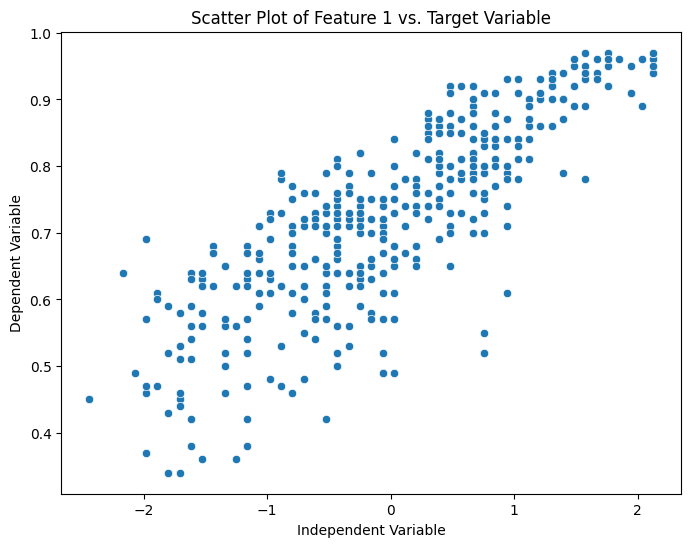

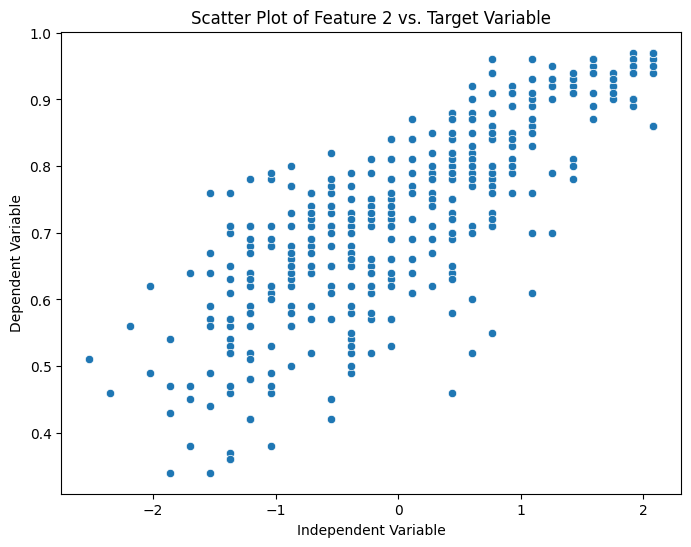

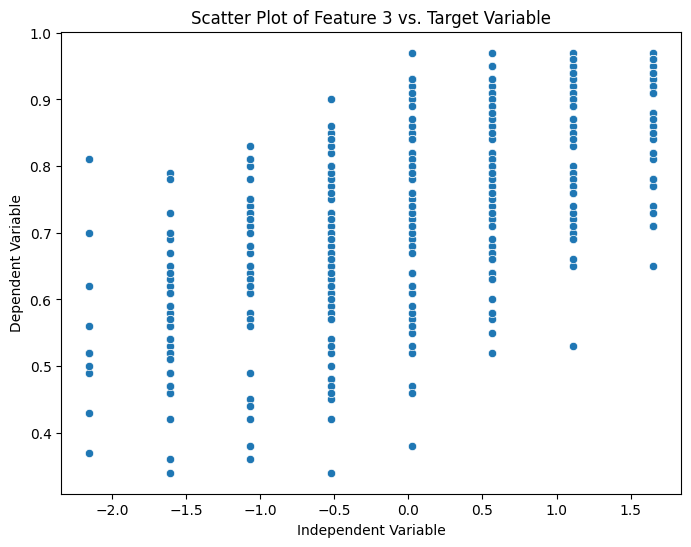

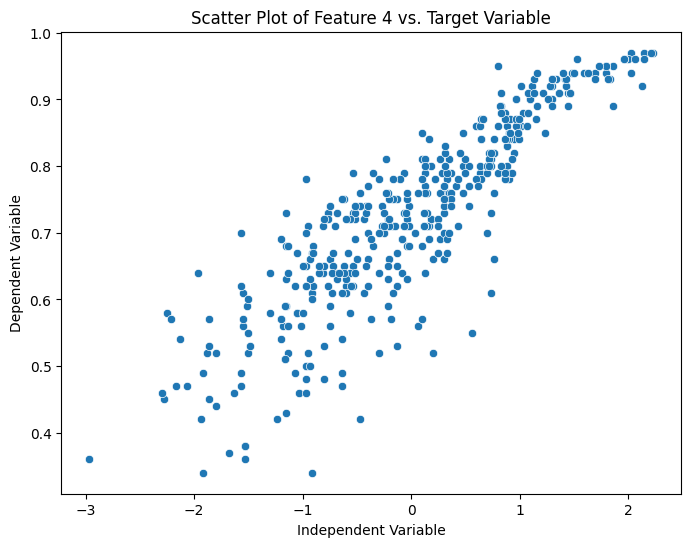

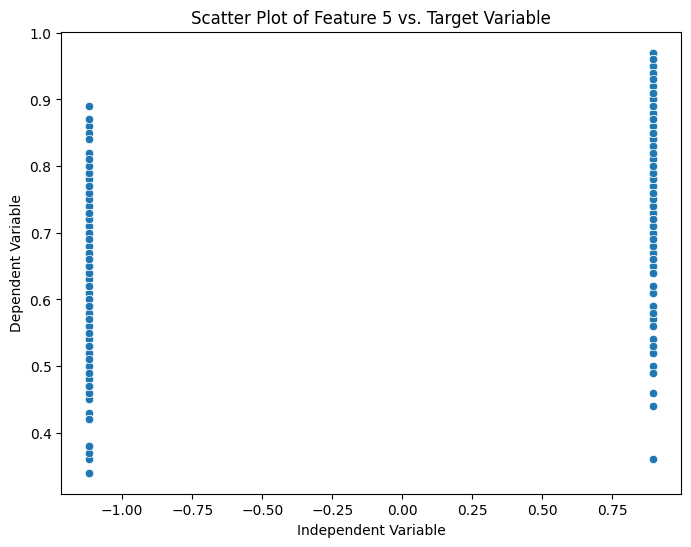

In [177]:
y_train_1d = np.array(y_train).reshape(-1)

# Scatter plots for each independent variable against the dependent variable
for i in range(x_train_scaled.shape[1]):  # Assuming x_train_scaled is a NumPy array
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_train_scaled[:, i].reshape(-1), y=y_train_1d)  # Reshape to 1D array
    plt.xlabel('Independent Variable')
    plt.ylabel('Dependent Variable')
    plt.title(f'Scatter Plot of Feature {i+1} vs. Target Variable')
    plt.show()

GPA / GRE Score / TOEFL Score almost show linear relationship which can be observed with correlation matrix

Test for Homoscedasticity



In [178]:
Y_hat = sm_model.predict(X_sm)

In [179]:
if isinstance(y_train, pd.Series):
    print("y_train is a Pandas Series")
elif isinstance(y_train, pd.DataFrame):
    print("y_train is a Pandas DataFrame")
else:
    print("y_train is neither a Pandas Series nor a Pandas DataFrame")

y_train is a Pandas DataFrame


In [180]:
y_train_column = y_train['Chance of Admit']

# Calculate errors as the difference between Y_hat and y_train_column
errors = Y_hat - y_train_column.values

Text(0.5, 1.0, 'Predicted values vs Residuals')

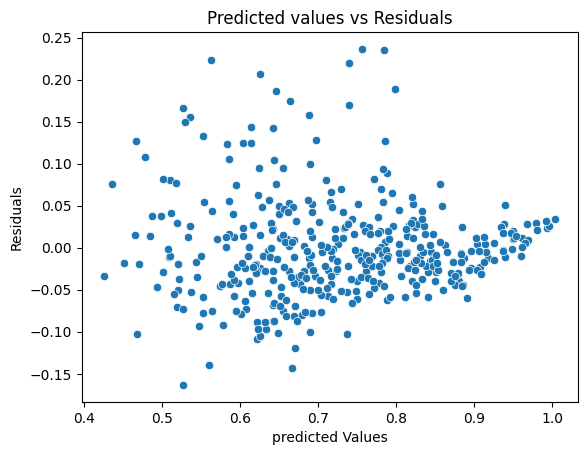

In [181]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Values")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

Goldfeld Quandt Test

In [182]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm)
lzip(name, test)

[('F statistic', 0.9592288620962849), ('p-value', 0.6139024845884469)]

## Observation :    

This difference is statistically significant at standard levels of significance (e.g., 0.05), according to the p-value of 0.613.

Thus, we conclude that there is no compelling evidence of heteroscedasticity in the data and accept the null hypothesis of homoscedasticity.



Normality of Residuals



Text(0.5, 1.0, 'Histogram of residuals')

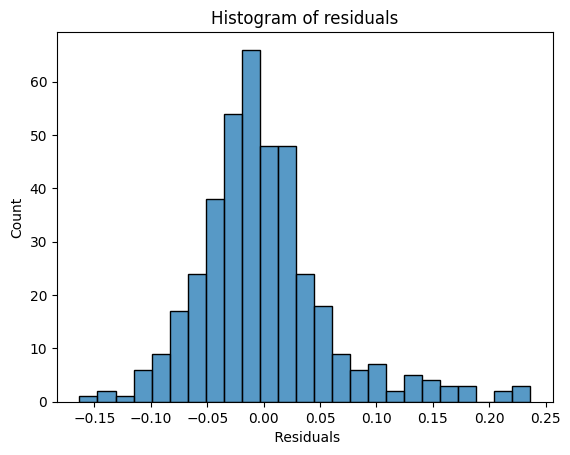

In [183]:
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

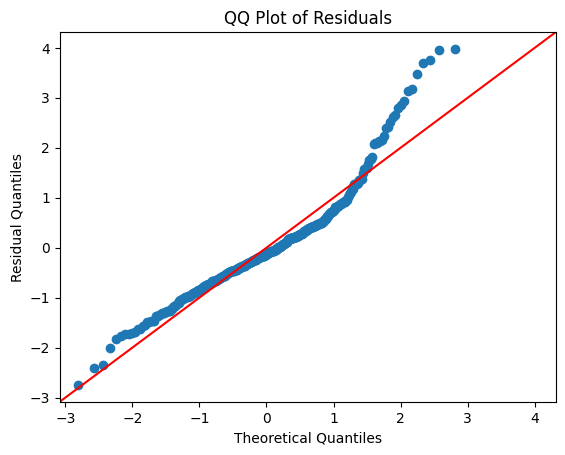

In [184]:
sm.qqplot(errors,line='45',fit=True)
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
plt.show()

Shapiro wilk Test for Normality

In [185]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic

0.931256678230213

Graphical Representation and Shapiro Wilk Test, both prove that the Residual errors are following normal distribution.

# Model Performance Evaluation


In [186]:
def adjusted_r2_score(y_true, y_pred, n_features):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
    return adjusted_r2

# MAE (Mean Absolute Error)
train_mae = mean_absolute_error(y_train, Y_hat)
test_mae = mean_absolute_error(y_test, y_pred_test)

# RMSE (Root Mean Square Error)
train_rmse = np.sqrt(mean_squared_error(y_train, Y_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# R-squared value
train_r2 = r2_score(y_train, Y_hat)
test_r2 = r2_score(y_test, y_pred_test)

# Number of features in the model (assuming X_train is your feature matrix)
n_features = x_train_scaled.shape[1]

# Adjusted R-squared value
train_adj_r2 = adjusted_r2_score(y_train, Y_hat, n_features)
test_adj_r2 = adjusted_r2_score(y_test, y_pred_test, n_features)

print("Training set:")
print("MAE:", train_mae)
print("RMSE:", train_rmse)
print("R-squared:", train_r2)
print("Adjusted R-squared:", train_adj_r2)

print("\nTesting set:")
print("MAE:", test_mae)
print("RMSE:", test_rmse)
print("R-squared:", test_r2)
print("Adjusted R-squared:", test_adj_r2)

Training set:
MAE: 0.04269126483606392
RMSE: 0.05944028044169098
R-squared: 0.8207326947514393
Adjusted R-squared: 0.8184577289487925

Testing set:
MAE: 0.042923455782657785
RMSE: 0.06142491974041883
R-squared: 0.8155002070847485
Adjusted R-squared: 0.8056863883126606


High R-squared and modified R-squared values, along with lower MAE and RMSE values, show that the model works well on both the training and testing sets.

# Lasso and Ridge Regression


In [187]:
lasso_model = Lasso()
ridge_model = Ridge()

In [188]:
lasso_model.fit(x_train_scaled, y_train)
ridge_model.fit(x_train_scaled, y_train)

Ridge()

In [189]:
lasso_predictions = lasso_model.predict(x_test_scaled)
ridge_predictions = ridge_model.predict(x_test_scaled)

In [190]:
print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

print("R^2 for lasso:",lasso_model.score(x_test_scaled,y_test))
print('R^2 for ridge:',ridge_model.score(x_test_scaled,y_test))

test MSE for L1: 0.020598230624999995
test MSE for L2: 0.0037770066475508435
R^2 for lasso: -0.00724844132029312
R^2 for ridge: 0.8153052984082717


In [191]:
lasso_train_predictions = lasso_model.predict(x_train_scaled)
ridge_train_predictions = ridge_model.predict(x_train_scaled)

In [192]:
print('train MSE for L1:', mean_squared_error(y_train, lasso_train_predictions))
print('train MSE for L2:', mean_squared_error(y_train, ridge_train_predictions))

print("R^2 for lasso:",lasso_model.score(x_train_scaled,y_train))
print('R^2 for ridge:',ridge_model.score(x_train_scaled,y_train))

train MSE for L1: 0.019708819375
train MSE for L2: 0.003533209387622887
R^2 for lasso: 0.0
R^2 for ridge: 0.8207295261884306


Better model performance in terms of fitting the training data is indicated by a lower MSE. Consequently, the train MSE of the L2 regularization (Ridge) model is lower than that of the L1 regularization (Lasso) model.

A higher R-squared value means that the independent factors account for a greater percentage of the variance in the dependent variable. Consequently, in comparison to the Lasso regularization model, the Ridge regularization model explains a greater amount of variance in the target variable.


In terms of both train MSE and R-squared value, the L2 regularization (Ridge) model performs better than the L1 regularization (Lasso) model.



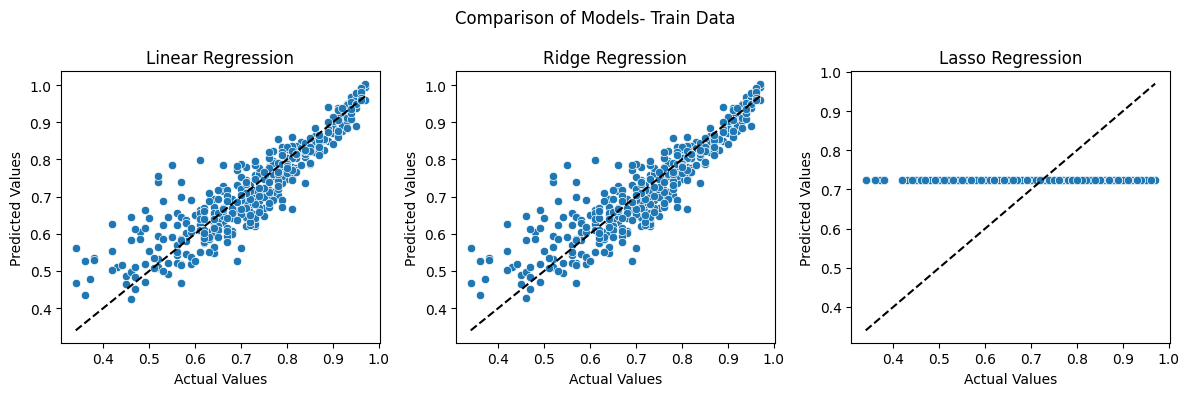

In [193]:
actual_values = y_train.values.reshape((-1,))
predicted_values = [Y_hat.reshape((-1,)), ridge_train_predictions.reshape((-1,)), lasso_train_predictions.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

plt.figure(figsize=(12,4))
i=1
for preds in predicted_values:
  ax = plt.subplot(1,3,i)
  sns.scatterplot(x=actual_values, y=preds)
  plt.plot([min(actual_values),max(actual_values)], [min(actual_values),max(actual_values)], 'k--')
  plt.suptitle('Comparison of Models- Train Data')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title(model[i-1])
  i+=1

plt.tight_layout()
plt.show()

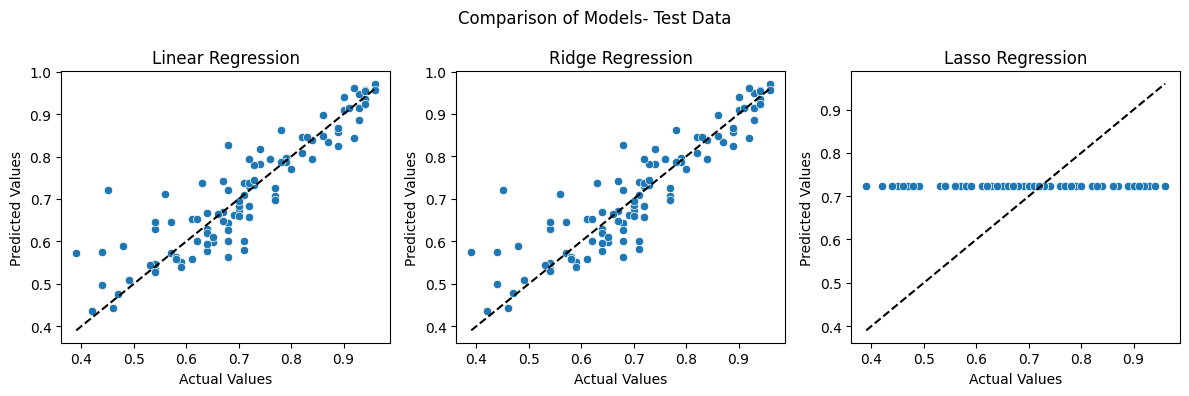

In [194]:
actual_values = y_test.values.reshape((-1,))
predicted_values = [y_pred_test.reshape((-1,)), ridge_predictions.reshape((-1,)), lasso_predictions.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

plt.figure(figsize=(12,4))
i=1
for preds in predicted_values:
  ax = plt.subplot(1,3,i)
  sns.scatterplot(x=actual_values, y=preds)
  plt.plot([min(actual_values),max(actual_values)], [min(actual_values),max(actual_values)], 'k--')
  plt.suptitle('Comparison of Models- Test Data')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title(model[i-1])
  i+=1

plt.tight_layout()
plt.show()

# Insights :    

* Overall, the Lasso regularization model's larger MSE and zero R-squared value imply that it may have oversimplified the model by aggressively reducing the number of features and shortening the coefficients, which ultimately resulted in a worse performance in capturing the correlations found in the data.


* This explains why Lasso regression's r2 score is zero. The target variable's variance is not captured by it. In every case, it has forecasted the same value.

* Up to 82% of the volatility in the goal variable (chance of admit) has been captured by the superior models Ridge Regression and Linear Regression.

* Admittance probability is highly positively correlated with CGPA, GRE, and TOEFL scores.

* Research indicates that all other factors have a weakly positive association.

* The majority of students are from universities with ratings of 3, 2, and 4.

* Strength 4 is the highest number of students who received a Statement of Purpose, followed by 3.5 and 3.

* The maximum number of pupils was reached by the letter of recommendation with strength 3. The majority of students have completed their research.

* With a grade of 5, the university has the highest chance of being admitted, followed by 4, 3, 2, 1.

* The maximum chance of admission is for SOP strength of 5, and it then decreases to 1 from there.

* Strength 5 LOR has the highest likelihood of being admitted.
Students who have conducted research are more likely to be admitted.

* 'University Rating' and 'SOP' have p-values greater than 0.05, which indicates that they have no statistically significant impact on the dependent variable.

* In order to demonstrate that there is no multicollinearity, these two features were eliminated from the modeling process, and the Condition Number was further decreased to 4.76, which is far below 30.

* The model is statistically significant when the probability (F-statistic) value is low.

* The highest weight is assigned to CGPA, which is followed by GRE, TOEFL, LOR, and research scores, which indicate the degree of correlation with the dependent variable.

* High R-squared and modified R-squared values, along with minimal MAE and RMSE values, show that the linear regression model performs well on both the training and testing sets.


# Recommendations :    

* Re-evaluate the importance of features like 'University Rating' and 'SOP'. Consider adding features that might have a stronger influence on admission chances.

* Consider incorporating demographic data, extracurricular activities, work experience, or program-specific information to enhance model accuracy.

* Integrate the refined model into Jamboree's website as a user-friendly tool for students.

* Provide clear interpretations of model predictions to help students understand the factors influencing their chances of admission.

* Regularly update the model based on new data and feedback to maintain its accuracy and relevance.

* A more accurate model strengthens Jamboree's reputation as a reliable source for admission guidance. By offering valuable insights, Jamboree can position itself as a trusted advisor and partner for students, potentially leading to increased enrollments in their programs.

* Keep up with advancements in machine learning and predictive modeling techniques to incorporate the latest methodologies into the model.

By implementing these recommendations, Jamboree can significantly improve the accuracy and reliability of its admission prediction model, providing valuable support and guidance to students aspiring to gain admission to top universities.